<a href="https://colab.research.google.com/github/shila-sahoo/cloudxlab-projects/blob/main/amazon_products.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os

amazon_data = pd.read_csv('/content/Amazon-Products.csv')
amazon_data.head()

,Unnamed: 0,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,"2,255","₹32,999","₹58,990"
1,1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,"2,948","₹46,490","₹75,990"
2,2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,"1,206","₹34,490","₹61,990"
3,3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4,69,"₹37,990","₹68,990"
4,4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,"₹34,490","₹67,790"


In [2]:
#Removing unnamed column which adds no information to the dataset
amazon_data = amazon_data.drop(columns=['Unnamed: 0'])

amazon_data.shape

(551585, 9)

In [3]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            551585 non-null  object
 1   main_category   551585 non-null  object
 2   sub_category    551585 non-null  object
 3   image           551585 non-null  object
 4   link            551585 non-null  object
 5   ratings         375791 non-null  object
 6   no_of_ratings   375791 non-null  object
 7   discount_price  490422 non-null  object
 8   actual_price    533772 non-null  object
dtypes: object(9)
memory usage: 37.9+ MB


In [4]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551585 entries, 0 to 551584
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            551585 non-null  object
 1   main_category   551585 non-null  object
 2   sub_category    551585 non-null  object
 3   image           551585 non-null  object
 4   link            551585 non-null  object
 5   ratings         375791 non-null  object
 6   no_of_ratings   375791 non-null  object
 7   discount_price  490422 non-null  object
 8   actual_price    533772 non-null  object
dtypes: object(9)
memory usage: 37.9+ MB


In [5]:
#Calculate the no. of datapoints having missing value in each of the column
amazon_data.isnull().sum()

name                   0
main_category          0
sub_category           0
image                  0
link                   0
ratings           175794
no_of_ratings     175794
discount_price     61163
actual_price       17813
dtype: int64

In [6]:
#Remove the rows with missing values
amazon_data=amazon_data.dropna()

In [7]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340680 entries, 0 to 551584
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            340680 non-null  object
 1   main_category   340680 non-null  object
 2   sub_category    340680 non-null  object
 3   image           340680 non-null  object
 4   link            340680 non-null  object
 5   ratings         340680 non-null  object
 6   no_of_ratings   340680 non-null  object
 7   discount_price  340680 non-null  object
 8   actual_price    340680 non-null  object
dtypes: object(9)
memory usage: 26.0+ MB


In [8]:
##Convert ratings to numeric field

#Find the unique values in ratings column
amazon_data['ratings'].unique()

array(['4.2', '4', '4.1', '4.3', '3.9', '3.8', '3.5', '4.6', '3.3', '3.4',
       '3.7', '2.9', '5', '4.4', '3.6', '2.7', '4.5', '3', '3.1', '4.8',
       '4.7', '3.2', '2.5', '1', '2.6', '2.8', '1.7', 'Get', '1.8', '2.4',
       '4.9', '2.2', '1.6', '1.9', '2.3', '2', '1.4', '2.1', 'FREE',
       '1.2', '1.3', '1.5', '₹65', '1.1', '₹70', '₹100', '₹99', '₹2.99'],
      dtype=object)

In [9]:
# Remove alphanumeric values and change the type to float
amazon_data['ratings'] = amazon_data['ratings'].replace(['Get','FREE','₹68.99', '₹65','₹70', '₹100', '₹99', '₹2.99'], '0.0')
amazon_data['ratings'] = amazon_data["ratings"].astype(float)
amazon_data['ratings'].unique()

array([4.2, 4. , 4.1, 4.3, 3.9, 3.8, 3.5, 4.6, 3.3, 3.4, 3.7, 2.9, 5. ,
       4.4, 3.6, 2.7, 4.5, 3. , 3.1, 4.8, 4.7, 3.2, 2.5, 1. , 2.6, 2.8,
       1.7, 0. , 1.8, 2.4, 4.9, 2.2, 1.6, 1.9, 2.3, 2. , 1.4, 2.1, 1.2,
       1.3, 1.5, 1.1])

In [10]:
##Convert no_of_ratings to numeric field

#Remove comma from the numeric strings
amazon_data["no_of_ratings"] = amazon_data["no_of_ratings"].str.replace(',', '')
#Convert string to numeric with non-numeric fields as nan
amazon_data["no_of_ratings"] = pd.to_numeric(amazon_data["no_of_ratings"], errors='coerce')
#Remove rows with nan
amazon_data=amazon_data.dropna()

In [11]:
##Convert discount_price and actual_price to numeric fields

# Removing the ₹ sign
amazon_data["discount_price"] = amazon_data["discount_price"].str.replace('₹', '')
amazon_data["actual_price"] = amazon_data["actual_price"].str.replace('₹', '')

# Change commas to dots and change the type to float
amazon_data['discount_price'] = amazon_data["discount_price"].str.replace(',', '').astype(float)
amazon_data['actual_price'] = amazon_data["actual_price"].str.replace(',', '').astype(float)

In [12]:
amazon_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334963 entries, 0 to 551584
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            334963 non-null  object 
 1   main_category   334963 non-null  object 
 2   sub_category    334963 non-null  object 
 3   image           334963 non-null  object 
 4   link            334963 non-null  object 
 5   ratings         334963 non-null  float64
 6   no_of_ratings   334963 non-null  float64
 7   discount_price  334963 non-null  float64
 8   actual_price    334963 non-null  float64
dtypes: float64(4), object(5)
memory usage: 25.6+ MB


In [13]:
#Create a manufacturer field from first word of name column and add it after name
amazon_data['manufacturer'] = amazon_data['name'].str.split(' ').str[0]
cols = amazon_data.columns.tolist()
print(cols)
cols=['name',
 'manufacturer',
 'main_category',
 'sub_category',
 'image',
 'link',
 'ratings',
 'no_of_ratings',
 'discount_price',
 'actual_price',
]
print(cols)
amazon_data = amazon_data[cols]
amazon_data.head()

['name', 'main_category', 'sub_category', 'image', 'link', 'ratings', 'no_of_ratings', 'discount_price', 'actual_price', 'manufacturer']
['name', 'manufacturer', 'main_category', 'sub_category', 'image', 'link', 'ratings', 'no_of_ratings', 'discount_price', 'actual_price']


,name,manufacturer,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,Lloyd,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,2255.0,32999.0,58990.0
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,LG,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,2948.0,46490.0,75990.0
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,LG,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,1206.0,34490.0,61990.0
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,LG,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69.0,37990.0,68990.0
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,Carrier,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630.0,34490.0,67790.0


In [14]:
# Create a net discount column and discount percent
amazon_data['discount_value'] = amazon_data['actual_price'] - amazon_data['discount_price']
amazon_data['discount_percent'] = 1 - amazon_data['discount_price']/amazon_data['actual_price']

amazon_data.head()

<ipython-input-14-98d714555307>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_data['discount_value'] = amazon_data['actual_price'] - amazon_data['discount_price']
<ipython-input-14-98d714555307>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_data['discount_percent'] = 1 - amazon_data['discount_price']/amazon_data['actual_price']


,name,manufacturer,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,discount_value,discount_percent
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,Lloyd,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,2255.0,32999.0,58990.0,25991.0,0.440600
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,LG,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,2948.0,46490.0,75990.0,29500.0,0.388209
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,LG,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,1206.0,34490.0,61990.0,27500.0,0.443620
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,LG,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69.0,37990.0,68990.0,31000.0,0.449340
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,Carrier,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630.0,34490.0,67790.0,33300.0,0.491223


In [15]:
# Detail of the maximum priced item
amazon_data[amazon_data["actual_price"] == amazon_data["actual_price"].max()]

,name,manufacturer,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,discount_value,discount_percent
194625,"Marutivilla Insect Killer, Mosquito Killer Lig...",Marutivilla,home & kitchen,Garden & Outdoors,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Marutivilla-Mosquito-Suc...,2.0,1.0,589.0,9.900000e+09,9.899999e+09,1.0


In [16]:
# Detail of the items sold with minimum discount
amazon_data[amazon_data["discount_value"] == amazon_data["discount_value"].min()]

,name,manufacturer,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,discount_value,discount_percent
436321,Mochi Women Gold Synthetic Sandals (44-9937MY),Mochi,women's shoes,Shoes,https://m.media-amazon.com/images/I/71OTpX0i59...,https://www.amazon.in/Mochi-Womens-Fashion-San...,3.6,28.0,1889.99,1890.0,0.01,0.000005
499918,GKFML Fiber Glass 30 METRE FIBER PLASTIKA MEAS...,GKFML,industrial supplies,"Test, Measure & Inspect",https://m.media-amazon.com/images/I/41kdufmMNA...,https://www.amazon.in/GKFML-Fiber-Glass-PLASTI...,3.3,8.0,589.99,590.0,0.01,0.000017


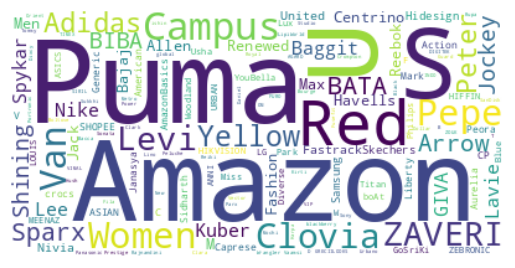

In [17]:
#Explore manufacturers according to number of its products sold in Amazon

import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Creating the text variable
text = " ".join(manufacturer for manufacturer in amazon_data.manufacturer)
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

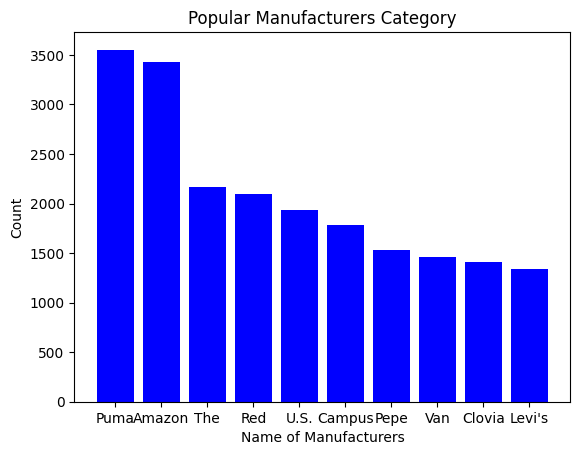

In [18]:
#Popular manufacturers - top 10

values = amazon_data["manufacturer"].value_counts().keys().tolist()[:10]
counts = amazon_data["manufacturer"].value_counts().tolist()[:10]
plt.bar(values, counts, color='blue')
plt.title("Popular Manufacturers Category")
plt.xlabel("Name of Manufacturers")
plt.ylabel("Count")
plt.show()

In [19]:
# Different main categories present
amazon_data["main_category"].unique()

array(['appliances', 'car & motorbike', 'tv, audio & cameras',
       'sports & fitness', 'grocery & gourmet foods', 'home & kitchen',
       'pet supplies', 'stores', 'toys & baby products', "kids' fashion",
       'bags & luggage', 'accessories', "women's shoes",
       'beauty & health', "men's shoes", "women's clothing",
       'industrial supplies', "men's clothing", 'music',
       'home, kitchen, pets'], dtype=object)

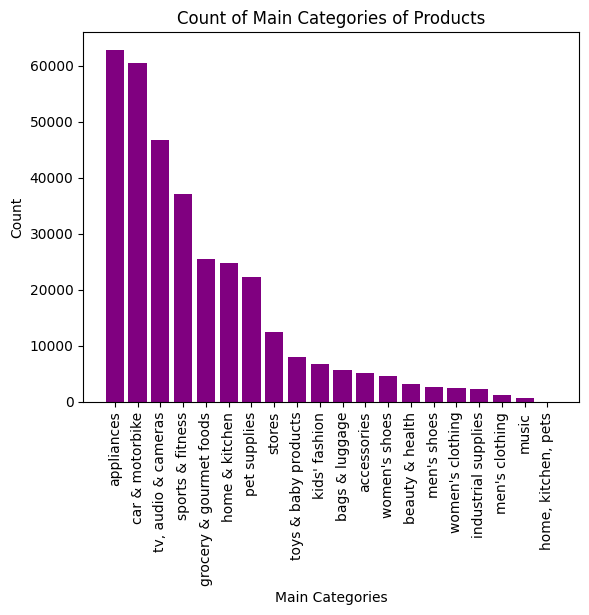

In [20]:
# Explore main categories of products sold in Amazon

values = amazon_data["main_category"].unique()
counts = amazon_data["main_category"].value_counts().tolist()
plt.bar(values, counts, color="purple")
plt.xticks(rotation='vertical')
plt.title("Count of Main Categories of Products")
plt.xlabel("Main Categories")
plt.ylabel("Count")
plt.show()

In [21]:
# Popular subcategories
import seaborn as sns
cm = sns.light_palette("green", as_cmap=True)
frame_sub = amazon_data[["main_category", "sub_category"]].groupby("main_category").count()
frame_sub.style.background_gradient(cmap=cm)

,sub_category
main_category,
accessories,62869
appliances,25547
bags & luggage,3213
beauty & health,6723
car & motorbike,5156
grocery & gourmet foods,2343
home & kitchen,12524
"home, kitchen, pets",12
industrial supplies,2592


In [22]:
# Rating of the products
print("The average rating: ",amazon_data["ratings"].unique())

print("The average price: ", amazon_data["actual_price"].mean())

The average rating:  [4.2 4.  4.1 4.3 3.9 3.8 3.5 4.6 3.3 3.4 3.7 2.9 5.  4.4 3.6 2.7 4.5 3.
 3.1 4.8 4.7 3.2 2.5 1.  2.6 2.8 1.7 1.8 2.4 4.9 2.2 1.6 1.9 2.3 2.  1.4
 2.1 1.2 1.3 1.5 1.1]
The average price:  32988.5458186725


In [23]:
# Statistics of the actual_price column of products
amazon_data.actual_price.describe()

count    3.349630e+05
mean     3.298855e+04
std      1.710586e+07
min      1.000000e+01
25%      9.000000e+02
50%      1.499000e+03
75%      2.799000e+03
max      9.900000e+09
Name: actual_price, dtype: float64

(array([4.750e+03, 1.501e+03, 5.880e+02, 2.660e+02, 1.790e+02, 1.150e+02,
        5.800e+01, 6.300e+01, 3.400e+01, 3.200e+01, 1.600e+01, 2.600e+01,
        1.900e+01, 1.200e+01, 1.300e+01, 9.000e+00, 1.600e+01, 7.000e+00,
        5.000e+00, 6.000e+00, 3.000e+00, 4.000e+00, 1.000e+00, 0.000e+00,
        2.000e+00, 5.000e+00, 6.000e+00, 2.000e+00, 4.000e+00, 2.000e+00,
        4.000e+00, 3.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 1.000e+00,
        3.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

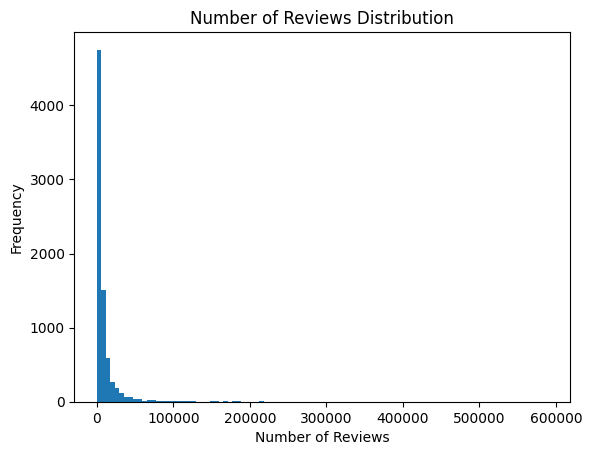

In [24]:
#Distribution of customer reviews
plt.title("Number of Reviews Distribution")
plt.xlabel("Number of Reviews")
plt.ylabel("Frequency")
plt.hist(amazon_data["no_of_ratings"].unique(), 100)

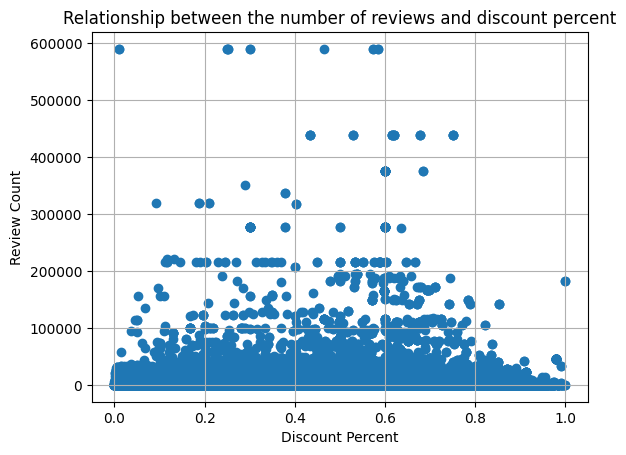

In [25]:
#Relationship between the number of reviews and discount percent
plt.scatter(amazon_data['discount_percent'], amazon_data['no_of_ratings'])
plt.title("Relationship between the number of reviews and discount percent")
plt.xlabel("Discount Percent")
plt.ylabel("Review Count")
plt.grid(True)
plt.show()

(array([170., 106.,  83.,  65.,  52.,  60.,  33.,  44.,  57.,  45.,  55.,
         34.,  40.,  50.,  52.,  59.,  40.,  40.,  46.,  47.,  64.,  42.,
         44.,  40.,  34.,  36.,  50.,  48.,  47.,  53.,  66.,  39.,  50.,
         43.,  56.,  43.,  41.,  50.,  45.,  39.,  66.,  37.,  40.,  51.,
         53.,  79.,  42.,  45.,  60., 133., 161.,  75.,  64.,  68.,  61.,
         55.,  57.,  49.,  48.,  41.,  86.,  44.,  60.,  58.,  48.,  45.,
         46.,  35.,  58.,  62.,  85.,  56.,  44.,  33.,  48.,  43.,  41.,
         49.,  44.,  43.,  70.,  46.,  41.,  61.,  51.,  52.,  45.,  46.,
         50.,  49.,  78.,  58.,  51.,  51.,  53.,  50.,  45.,  55.,  69.,
        156., 259.,  61.,  61.,  52.,  62.,  52.,  42.,  51.,  54.,  52.,
         82.,  54., 106.,  81.,  56.,  64.,  72.,  69.,  56.,  63., 104.,
         52.,  55.,  60.,  53.,  59.,  54.,  52.,  52., 110., 106.,  89.,
         63.,  63.,  53.,  57.,  65.,  57.,  62.,  51.,  63.,  60.,  64.,
         46.,  68.,  70.,  59.,  51., 

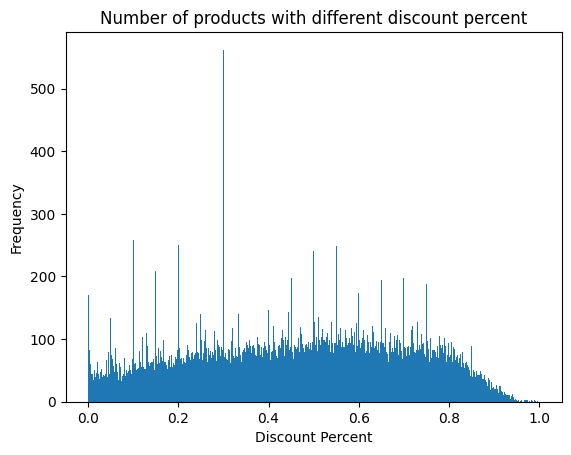

In [26]:
#Distribution of customer reviews with discount percent
plt.title("Number of products with different discount percent")
plt.xlabel("Discount Percent")
plt.ylabel("Frequency")
plt.hist(amazon_data["discount_percent"].unique(), 1000)